# <center> EDA on Walmart Dataset

##### Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

##### Loading dataset

In [2]:
data=pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.isnull().mean()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [6]:
data.duplicated().sum()

0

In [7]:
data.shape

(6435, 8)

In [8]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

#### Sorting the dataframe using date

In [9]:
data.sort_values(by='Date',inplace=True)
data.reset_index(drop=True,inplace=True)

In [10]:
data['Year']=data.Date.dt.year
data['Month']=data.Date.dt.month
data['Day']=data.Date.dt.day
data['WeekDay']=data.Date.dt.dayofweek
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,10,6
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,10,6
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,10,6
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,10,6
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,10,6


In [11]:
data.WeekDay.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
data.Month.replace({1:'January',2:'Febrary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,2010,January,10,Saturday
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,2010,January,10,Saturday
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,2010,January,10,Saturday
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,2010,January,10,Saturday
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,2010,January,10,Saturday


### Univariate analysis

HISTPLOT

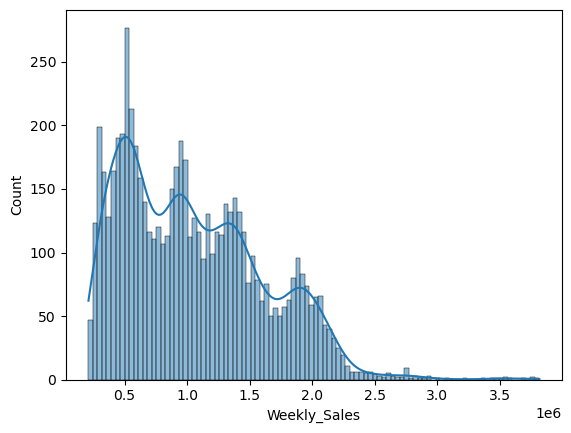

In [12]:
sns.histplot(data=data,x='Weekly_Sales',kde=True,bins=100)
plt.show()

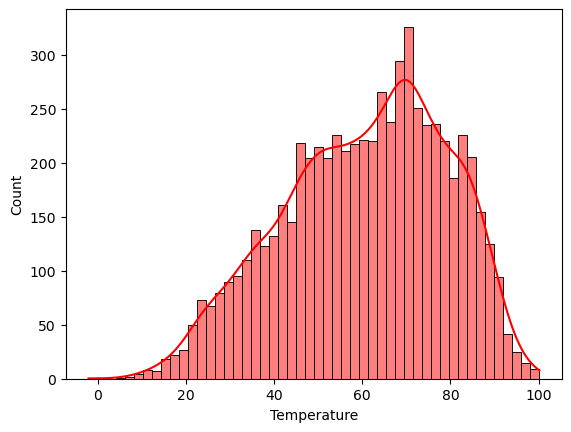

In [13]:
sns.histplot(data=data,x='Temperature',kde=True,color='red',bins=50)
plt.show()

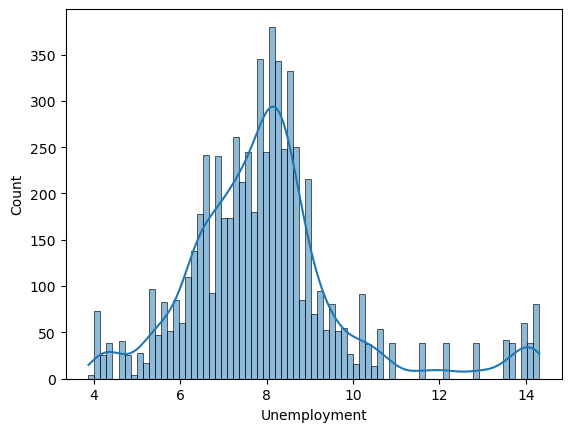

In [14]:
sns.histplot(data=data,x='Unemployment',kde=True,bins=75)
plt.show()

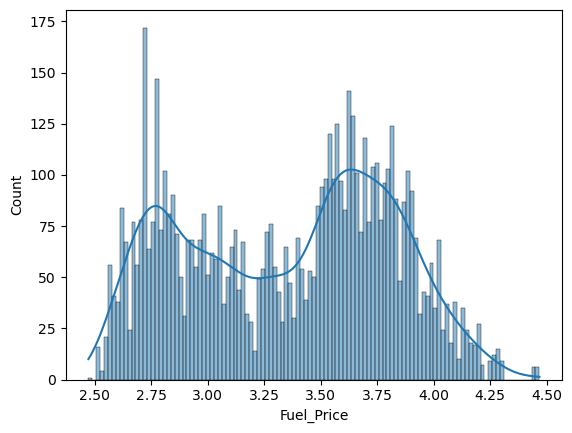

In [15]:
sns.histplot(data=data,x='Fuel_Price',bins=115,kde=True);

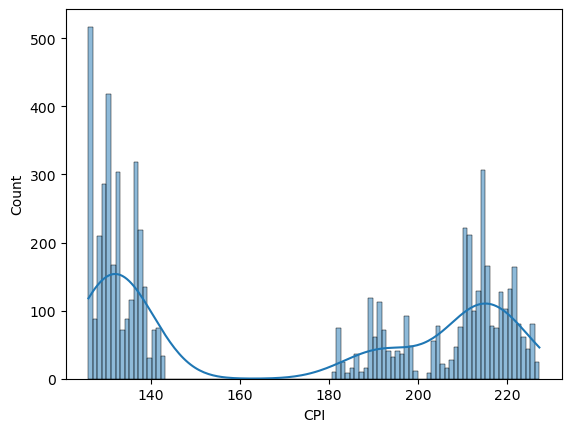

In [16]:
sns.histplot(data=data,x='CPI',bins=100,kde=True);

BOX PLOT

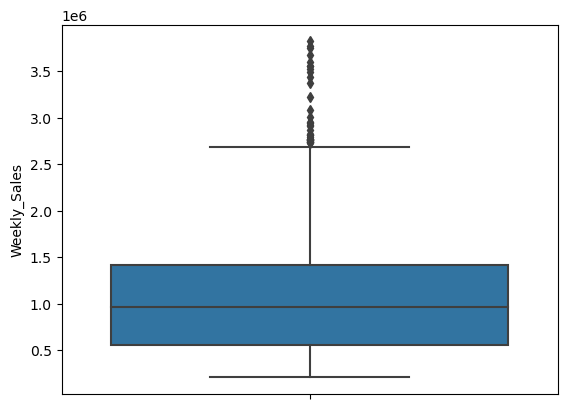

In [17]:
sns.boxplot(data=data,y='Weekly_Sales')
plt.show()

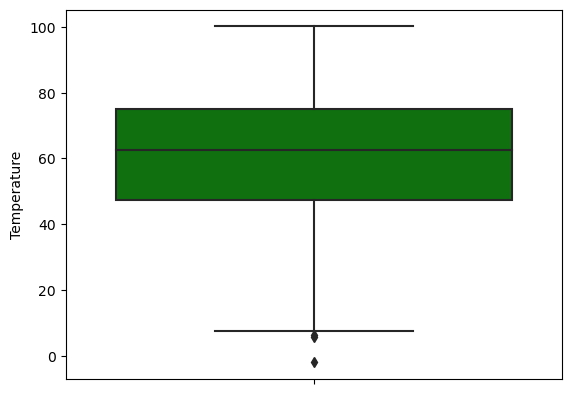

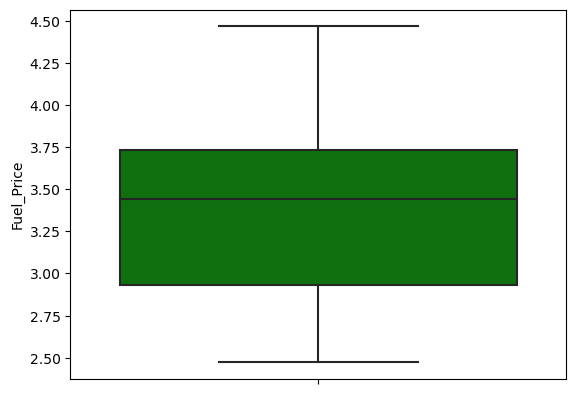

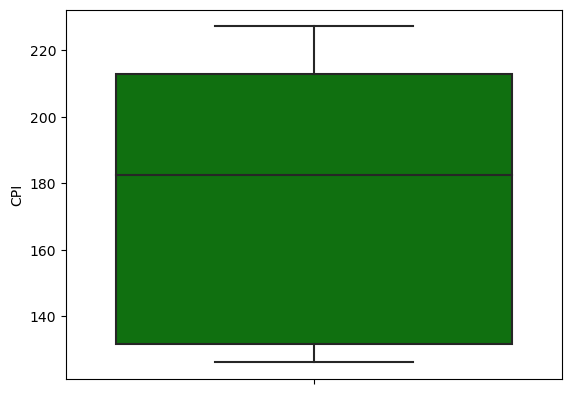

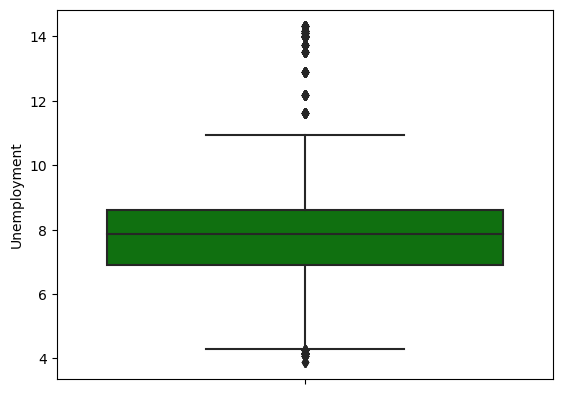

In [18]:
columns=['Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in columns:
    sns.boxplot(y=data[i],data=data,color='g')
    plt.show()

### Multivariate analysis

COUNT PLOT

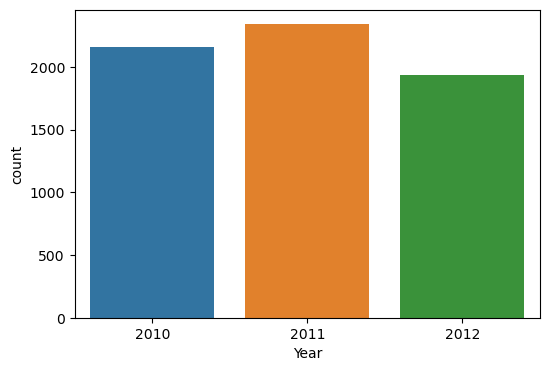

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='Year')
plt.show();

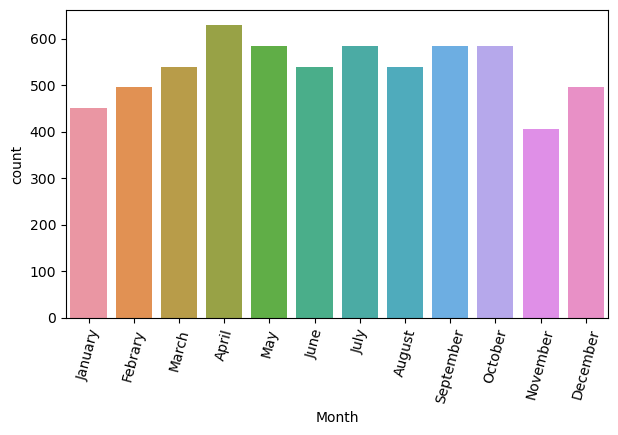

In [20]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=75)
sns.countplot(data=data,x='Month')
plt.show()

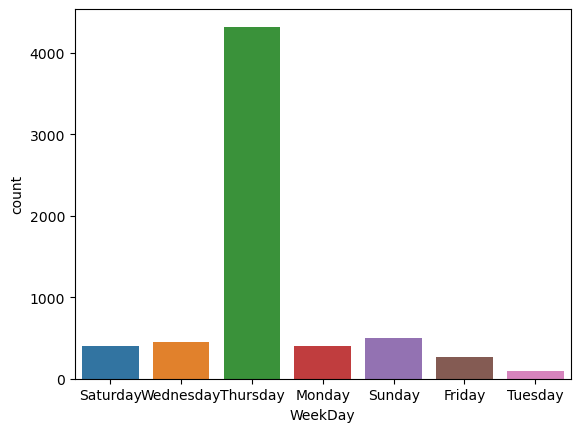

In [21]:
sns.countplot(data=data,x='WeekDay')
plt.show()

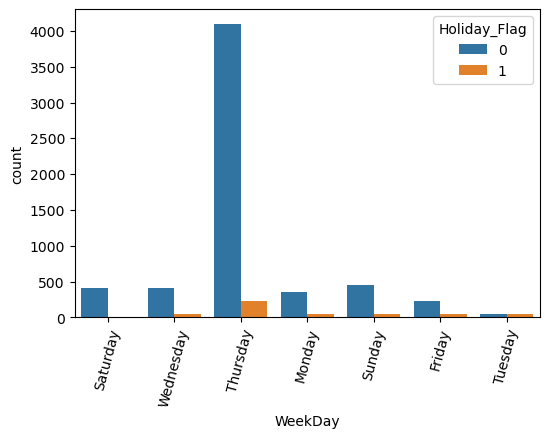

In [22]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=75)
sns.countplot(data=data,x='WeekDay',hue='Holiday_Flag')
plt.show()

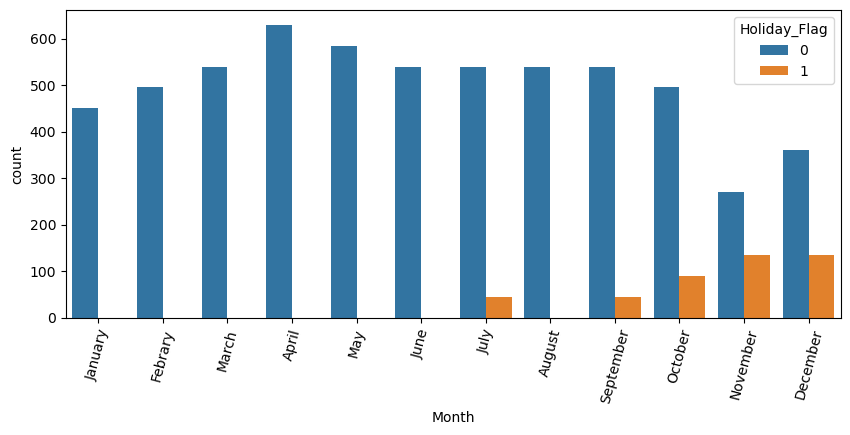

In [23]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=75)
sns.countplot(data=data,x='Month',hue='Holiday_Flag')
plt.show()

LINE CHART

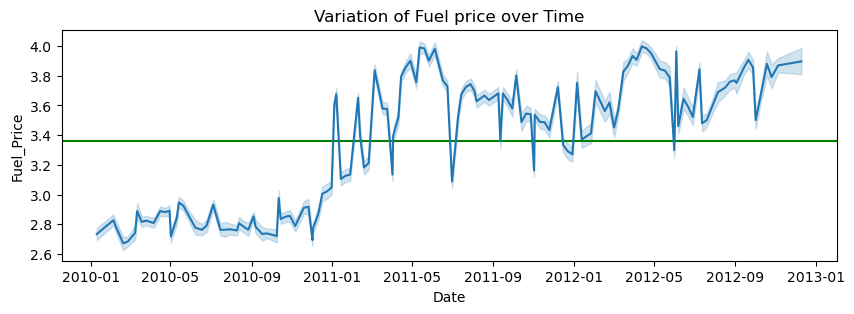

In [24]:
plt.figure(figsize=(10,3))
plt.title('Variation of Fuel price over Time')
plt.axhline(y=data.Fuel_Price.mean(), color='g')
sns.lineplot(data=data,x='Date',y='Fuel_Price')
plt.show()

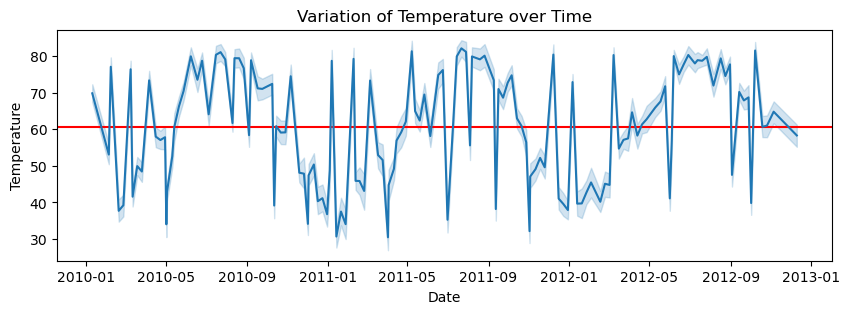

In [25]:
plt.figure(figsize=(10,3))
plt.title('Variation of Temperature over Time')
plt.axhline(y=data.Temperature.mean(), color='r')
sns.lineplot(data=data,x='Date',y='Temperature')
plt.show()

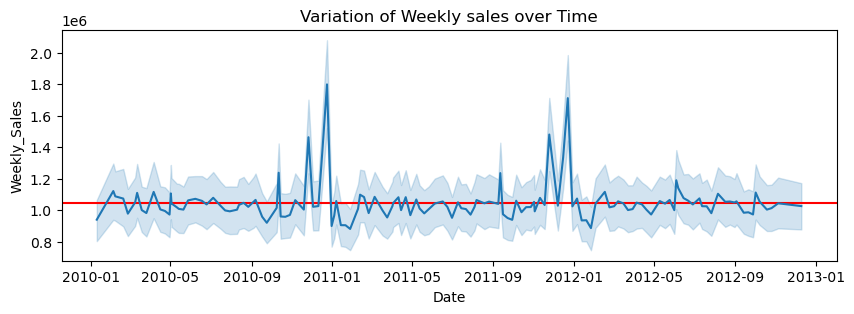

In [26]:
plt.figure(figsize=(10,3))
plt.title('Variation of Weekly sales over Time')
plt.axhline(y=data.Weekly_Sales.mean(), color='r')
sns.lineplot(data=data,x='Date',y='Weekly_Sales')
plt.show()

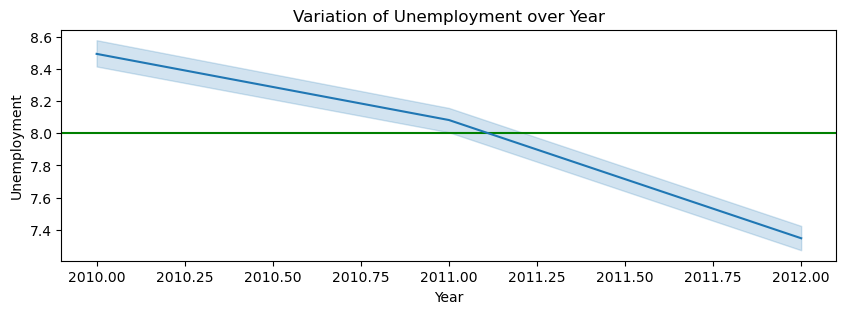

In [27]:
plt.figure(figsize=(10,3))
plt.title('Variation of Unemployment over Year')
plt.axhline(y=data.Unemployment.mean(), color='g')
sns.lineplot(data=data,x='Year',y='Unemployment')
plt.show()

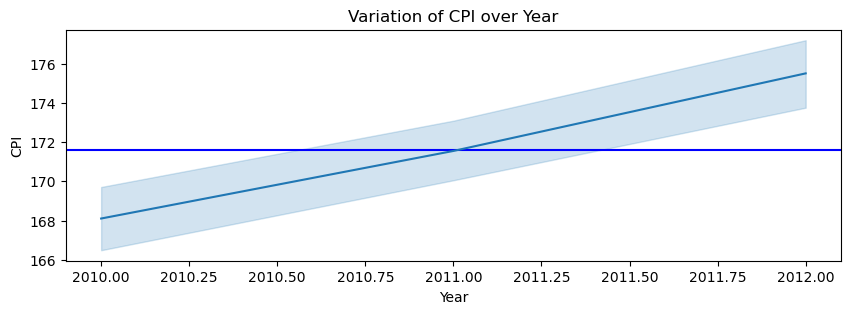

In [28]:
plt.figure(figsize=(10,3))
plt.title('Variation of CPI over Year')
plt.axhline(y=data.CPI.mean(), color='b')
sns.lineplot(data=data,x='Year',y='CPI')
plt.show()

SCATTER PLOT

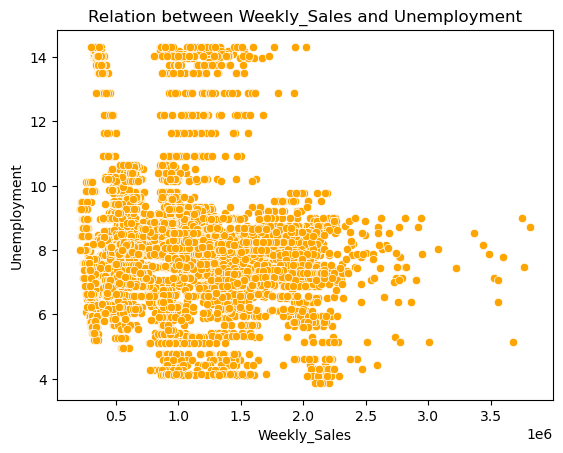

In [29]:
sns.scatterplot(data=data,x='Weekly_Sales',y='Unemployment',color='orange')
plt.title('Relation between Weekly_Sales and Unemployment')
plt.show()

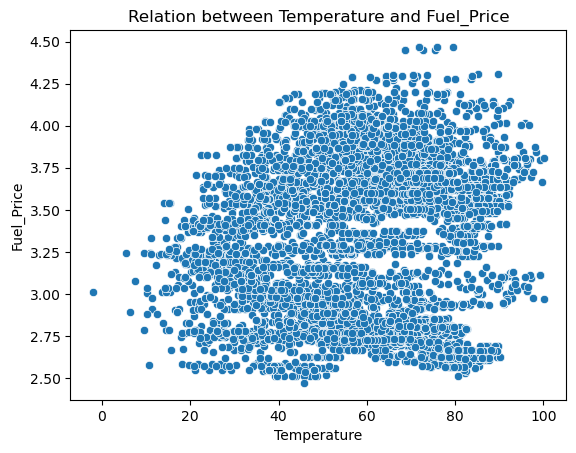

In [30]:
sns.scatterplot(data=data,x='Temperature',y='Fuel_Price')
plt.title('Relation between Temperature and Fuel_Price')
plt.show()

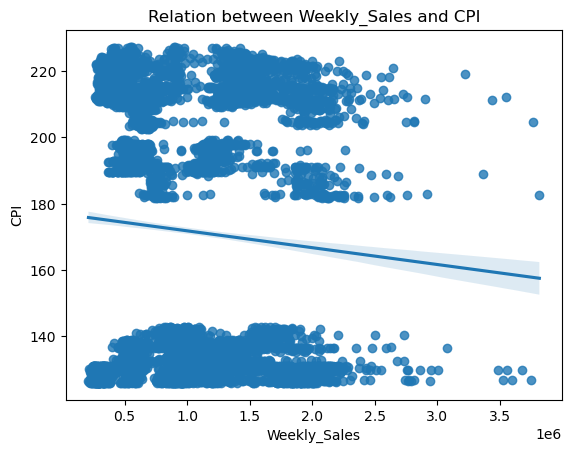

In [31]:
sns.regplot(data=data,x='Weekly_Sales',y='CPI')
plt.title('Relation between Weekly_Sales and CPI')
plt.show()

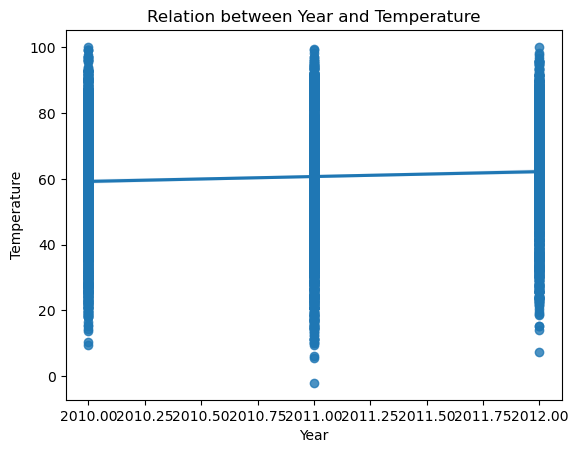

In [32]:
sns.regplot(data=data,x='Year',y='Temperature')
plt.title('Relation between Year and Temperature')
plt.show()

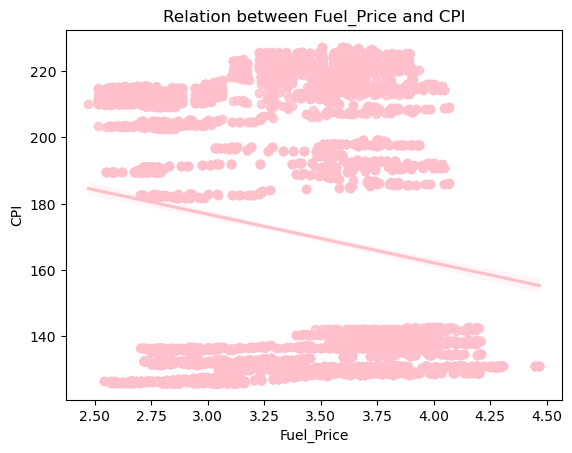

In [33]:
sns.regplot(data=data,x='Fuel_Price',y='CPI',color='pink')
plt.title('Relation between Fuel_Price and CPI')
plt.show()

PIE CHART

In [34]:
weekday_sales=data.groupby(['WeekDay'])['Weekly_Sales'].mean()
weekday_sales

WeekDay
Friday       1.046277e+06
Monday       1.070389e+06
Saturday     1.053356e+06
Sunday       1.088916e+06
Thursday     1.038485e+06
Tuesday      1.030142e+06
Wednesday    1.059165e+06
Name: Weekly_Sales, dtype: float64

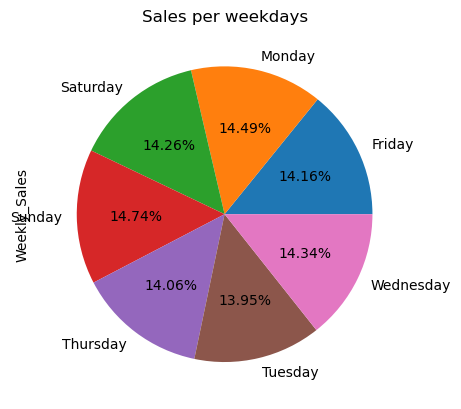

In [35]:
plt.title('Sales per weekdays')
weekday_sales.plot.pie(autopct='%0.2f%%');

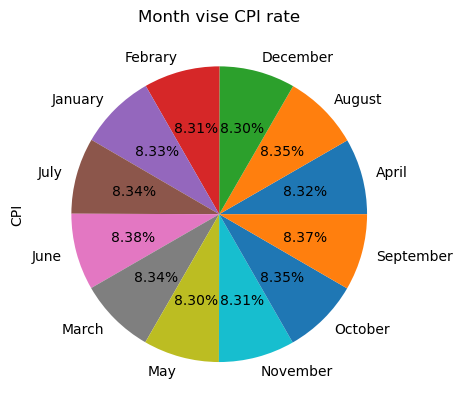

In [36]:
plt.title('Month vise CPI rate')
monthvise_fuelprice=data.groupby(['Month'])['CPI'].mean()
monthvise_fuelprice.plot.pie(autopct='%1.2f%%');

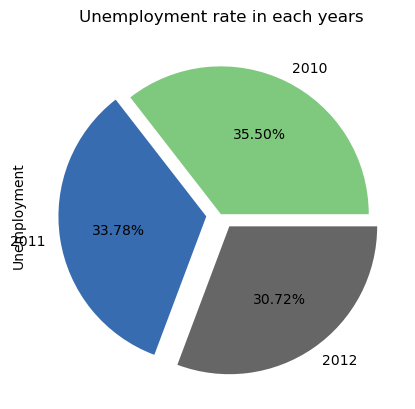

In [37]:
plt.title('Unemployment rate in each years')
year_temp=data.groupby(['Year'])['Unemployment'].mean()
year_temp.plot.pie(autopct='%1.2f%%',cmap='Accent',explode=[0,0.1,0.1]);

BAR PLOT

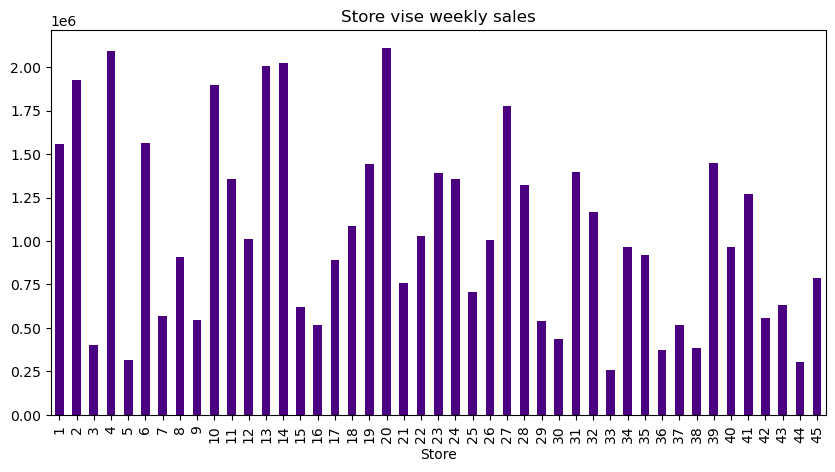

In [38]:
store_weaklysale=data.groupby(['Store'])['Weekly_Sales'].mean()
store_weaklysale.plot.bar(figsize=(10,5),color='indigo',title='Store vise weekly sales');

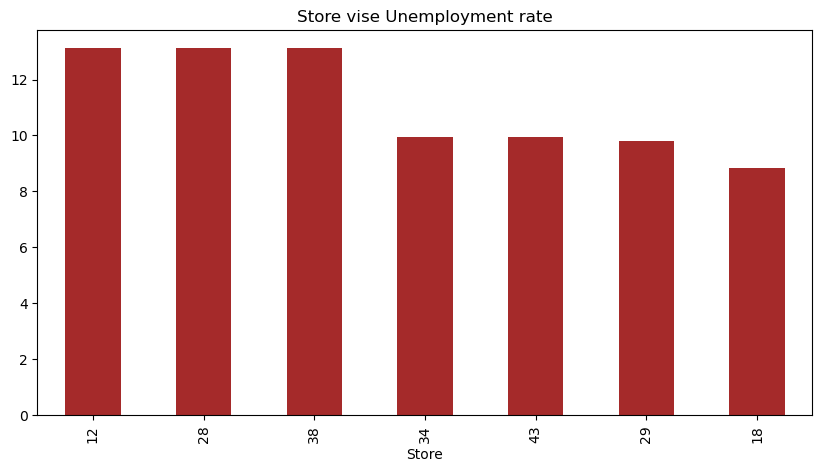

In [39]:
store_weaklysale=data.groupby(['Store'])['Unemployment'].mean()
store_weaklysale.nlargest(7).plot.bar(figsize=(10,5),color='brown',title='Store vise Unemployment rate');

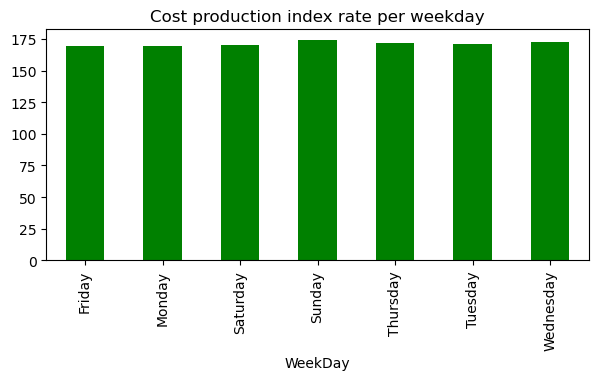

In [40]:
store_weaklysale=data.groupby(['WeekDay'])['CPI'].mean()
store_weaklysale.plot.bar(figsize=(7,3),color='green',title='Cost production index rate per weekday');

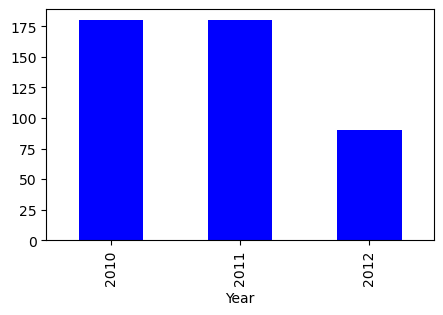

In [41]:
holiday_year=data.groupby(['Year'])['Holiday_Flag'].sum()
holiday_year.plot.bar(figsize=(5,3),color='blue');

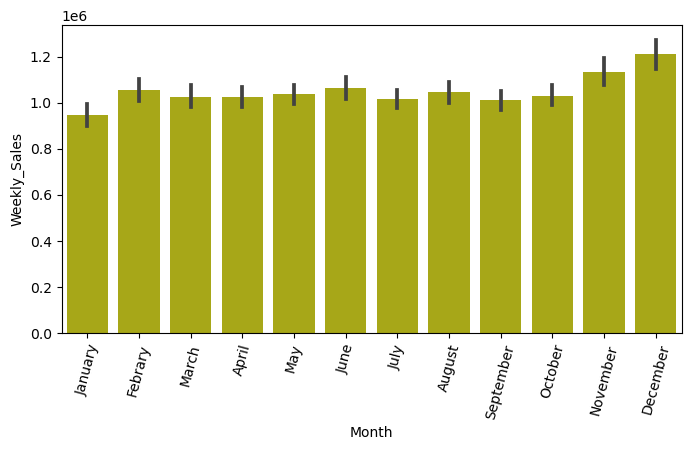

In [42]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=75)
sns.barplot(y=data.Weekly_Sales,x=data.Month,color='y')
plt.show();

### Year vise plots

In [43]:
Year_2010=data[data.Year==2010]
Year_2011=data[data.Year==2011]
Year_2012=data[data.Year==2012]

In [44]:
Year_2010.drop(columns='Year',inplace=True)
Year_2011.drop(columns='Year',inplace=True)
Year_2012.drop(columns='Year',inplace=True)

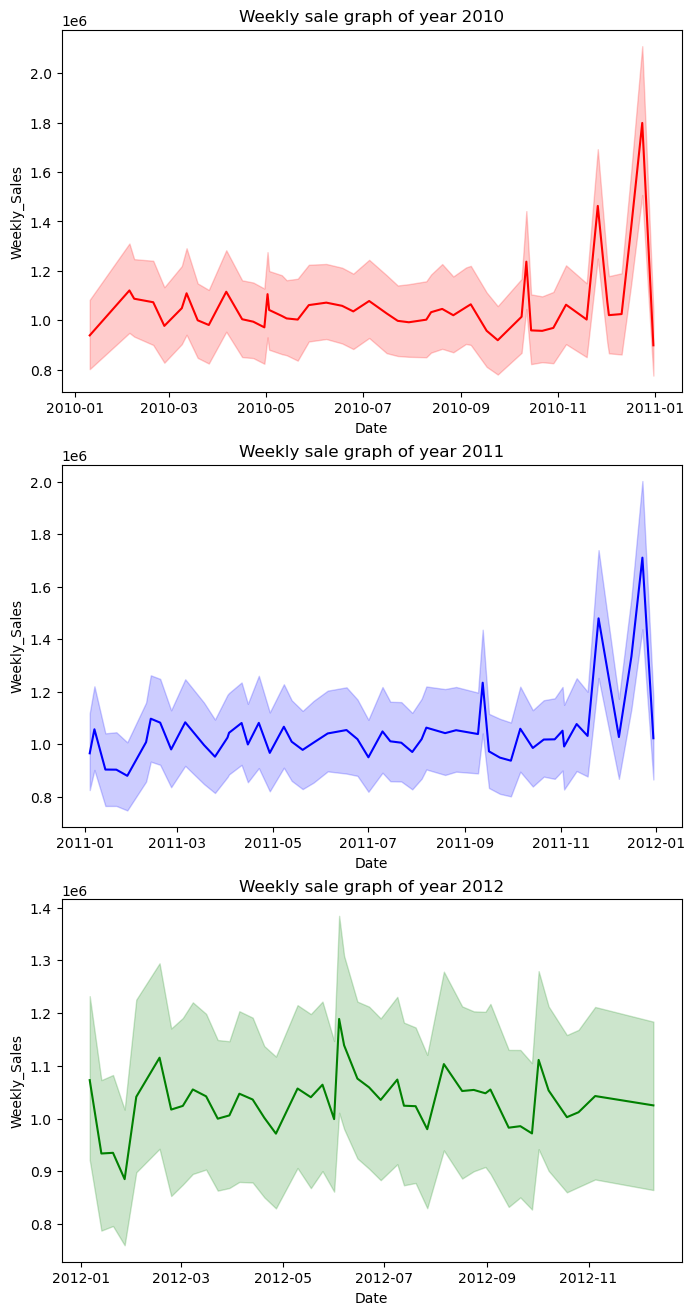

In [45]:
plt.figure(figsize=(8,16))
plt.subplot(3,1,1)
plt.title('Weekly sale graph of year 2010')
sns.lineplot(data=Year_2010, x='Date',y='Weekly_Sales', color='r')

plt.subplot(3,1,2)
plt.title('Weekly sale graph of year 2011')
sns.lineplot(data=Year_2011, x='Date',y='Weekly_Sales', color='b')

plt.subplot(3,1,3)
plt.title('Weekly sale graph of year 2012')
sns.lineplot(data=Year_2012, x='Date',y='Weekly_Sales', color='g')
plt.show()

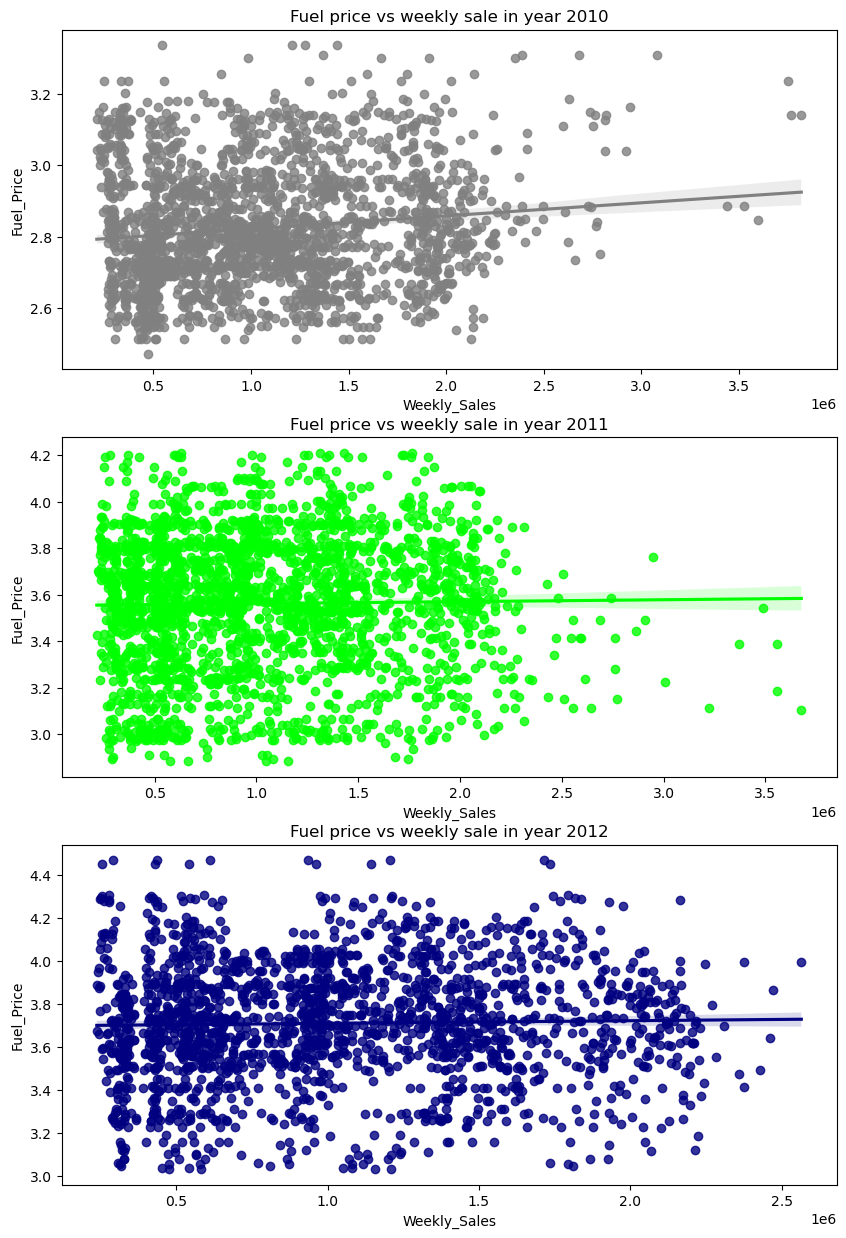

In [46]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.title('Fuel price vs weekly sale in year 2010')
sns.regplot(data=Year_2010, x='Weekly_Sales',y='Fuel_Price', color='gray')

plt.subplot(3,1,2)
plt.title('Fuel price vs weekly sale in year 2011')
sns.regplot(data=Year_2011, x='Weekly_Sales',y='Fuel_Price', color='lime')

plt.subplot(3,1,3)
plt.title('Fuel price vs weekly sale in year 2012')
sns.regplot(data=Year_2012, x='Weekly_Sales',y='Fuel_Price', color='navy')
plt.show()

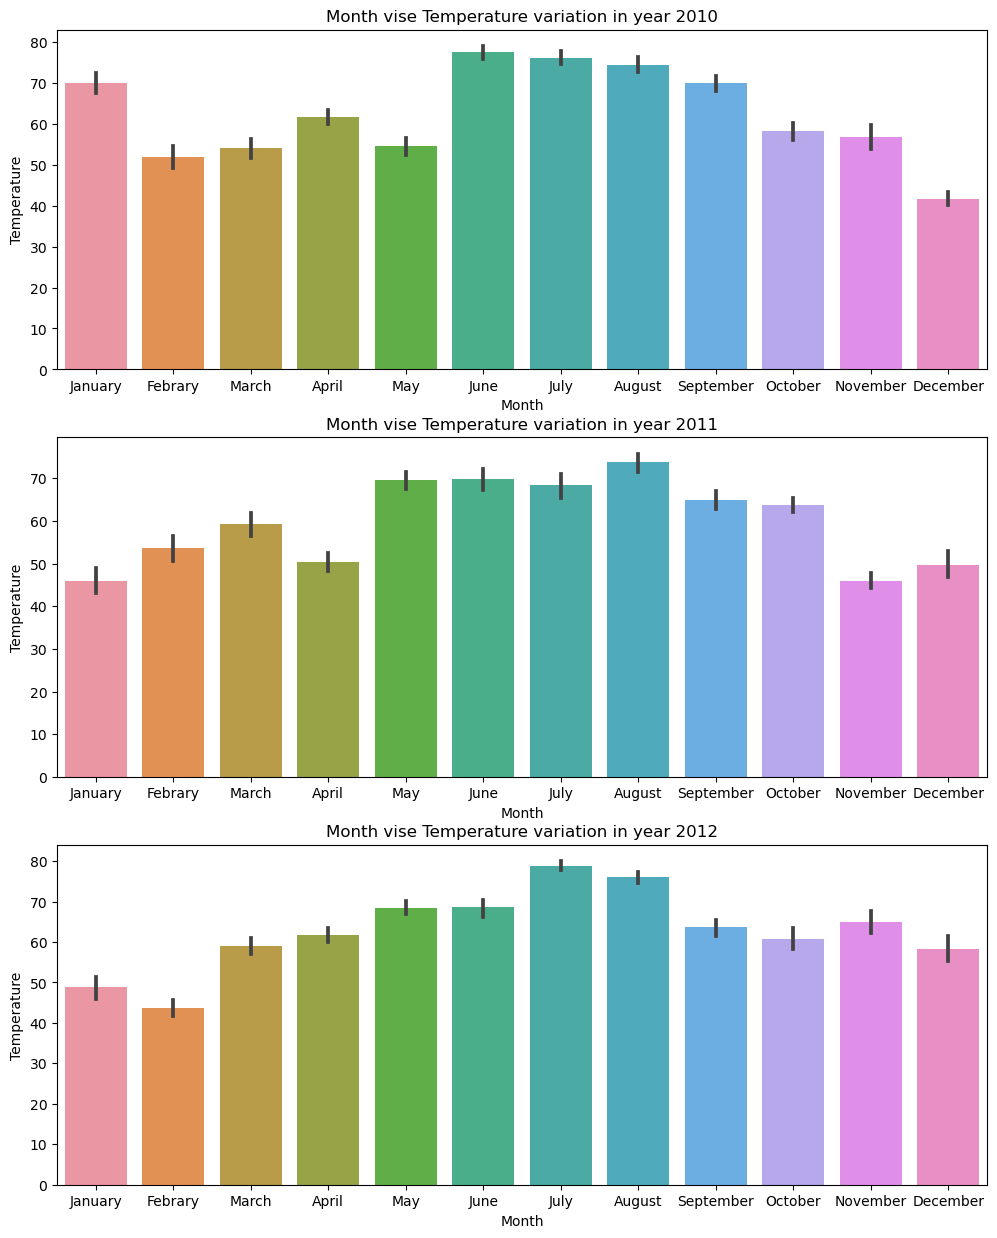

In [47]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt.title('Month vise Temperature variation in year 2010')
sns.barplot(data=Year_2010, x='Month',y='Temperature')

plt.subplot(3,1,2)
plt.title('Month vise Temperature variation in year 2011')
sns.barplot(data=Year_2011, x='Month',y='Temperature')

plt.subplot(3,1,3)
plt.title('Month vise Temperature variation in year 2012')
sns.barplot(data=Year_2012, x='Month',y='Temperature')
plt.show()

#### Yearly sales from each store

In [48]:
yearly_sale_store=data.groupby(['Store','Year'])['Weekly_Sales'].sum()
yearly_sale_store=yearly_sale_store.reset_index()
yearly_sale_store

,Store,Year,Weekly_Sales
0,1,2010,73278832.00
1,1,2011,80921918.83
2,1,2012,68202058.02
3,2,2010,95277864.19
4,2,2011,98607881.42
...,...,...,...
130,44,2011,15498194.67
131,44,2012,14187373.72
132,45,2010,38536343.37
133,45,2011,41135367.88


In [49]:
yearly_sale_store.nlargest(5,'Weekly_Sales')

,Store,Year,Weekly_Sales
10,4,2011,1.110923e+08
58,20,2011,1.098370e+08
40,14,2011,1.060963e+08
39,14,2010,1.054622e+08
37,13,2011,1.045375e+08


#### Top stores in each year

In [50]:
yearly_sale_store_2010=yearly_sale_store[yearly_sale_store.Year==2010]
yearly_sale_store_2011=yearly_sale_store[yearly_sale_store.Year==2011]
yearly_sale_store_2012=yearly_sale_store[yearly_sale_store.Year==2012]

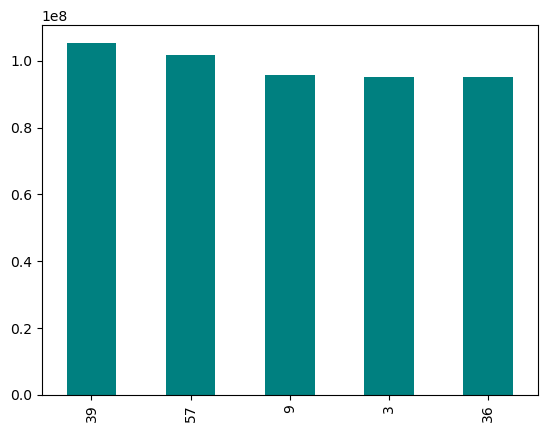

In [51]:
yearly_sale_store_2010.Weekly_Sales.nlargest(5).plot.bar(color='teal');

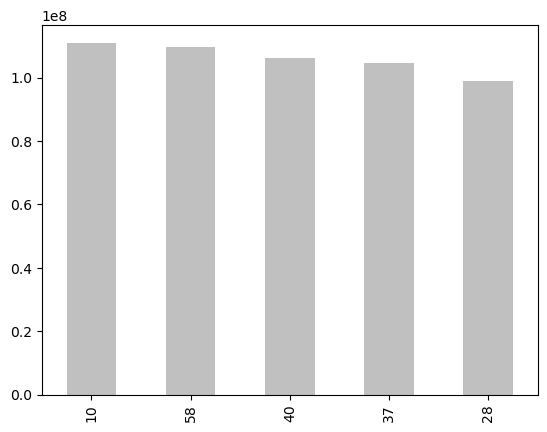

In [52]:
yearly_sale_store_2011.Weekly_Sales.nlargest(5).plot.bar(color='silver');

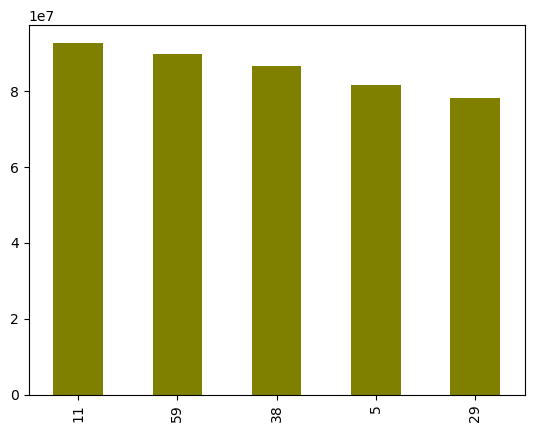

In [53]:
yearly_sale_store_2012.Weekly_Sales.nlargest(5).plot.bar(color='olive');

### Temperature conversion (-2°F -32) × 5/9

In [54]:
data['Celcius']=[(temp-32)*(5/9) for temp in data.Temperature]
data.drop(columns='Temperature',inplace=True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay,Celcius
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,2010,January,10,Saturday,21.722222
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,2010,January,10,Saturday,15.383333
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,2010,January,10,Saturday,30.005556
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,2010,January,10,Saturday,33.027778
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,2010,January,10,Saturday,23.700000


### Creating new column to display categorisation of  temerature in celcius

In [55]:
data['weather']=pd.cut(x=data.Celcius,bins=[-20,15,27,40],labels=['cold','normal','hot'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Year,Month,Day,WeekDay,Celcius,weather
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,2010,January,10,Saturday,21.722222,normal
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,2010,January,10,Saturday,15.383333,normal
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,2010,January,10,Saturday,30.005556,hot
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,2010,January,10,Saturday,33.027778,hot
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,2010,January,10,Saturday,23.700000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,41,2012-12-10,1409544.97,0,3.760,199.053937,6.195,2012,December,10,Sunday,4.100000,cold
6431,16,2012-12-10,491817.19,0,3.760,199.053937,5.847,2012,December,10,Sunday,6.255556,cold
6432,10,2012-12-10,1713889.11,0,4.468,131.108333,6.943,2012,December,10,Sunday,24.461111,normal
6433,25,2012-12-10,697317.41,0,4.000,216.115057,7.293,2012,December,10,Sunday,6.522222,cold


In [56]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'WeekDay', 'Celcius',
       'weather'],
      dtype='object')

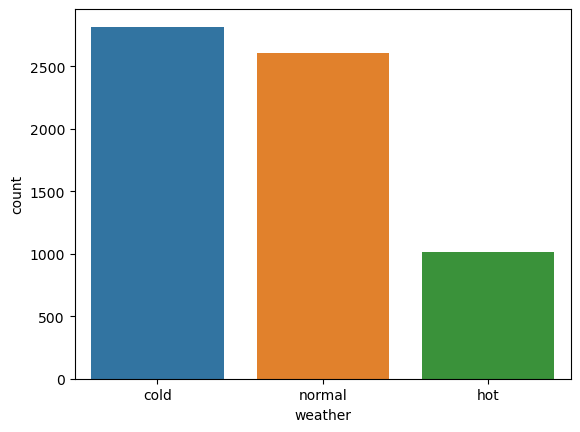

In [57]:
sns.countplot(x=data.weather);

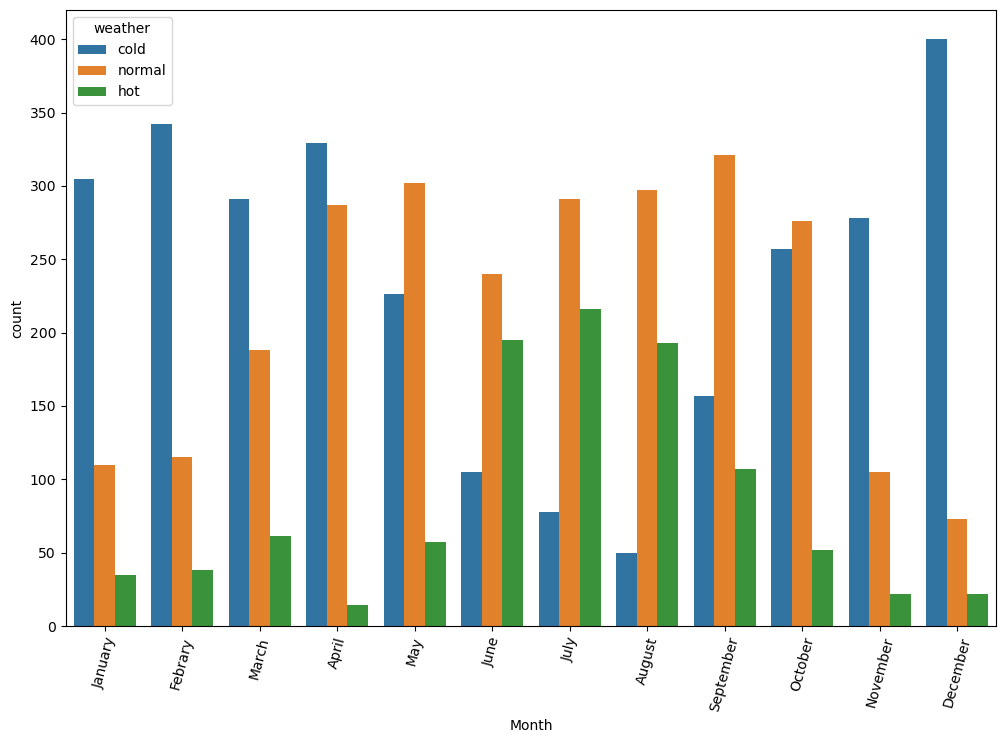

In [58]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
sns.countplot(x=data.Month,hue=data.weather)
plt.show()

#### HEAT MAP

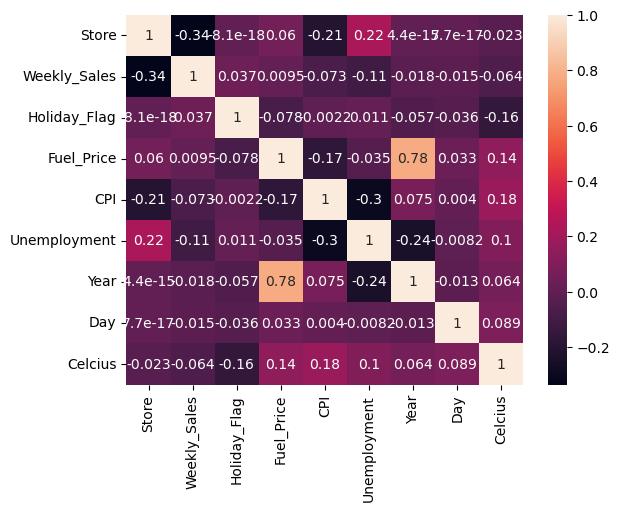

In [59]:
sns.heatmap(data.corr(),annot=True);

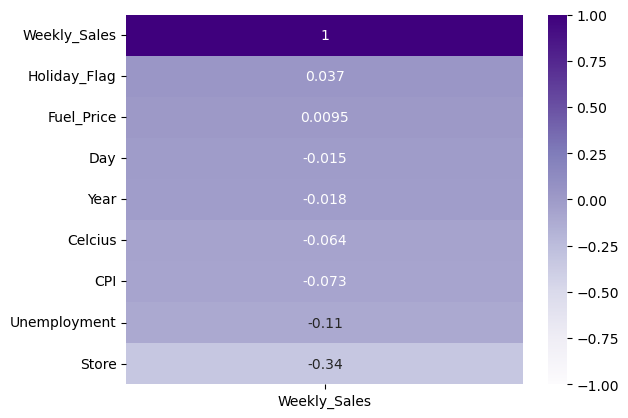

In [60]:
sns.heatmap(data.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False),annot=True,vmin=-1,vmax=1,cmap='Purples');

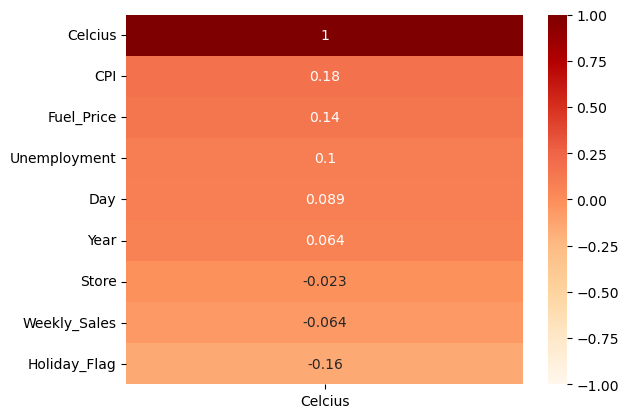

In [61]:
sns.heatmap(data.corr()[['Celcius']].sort_values(by='Celcius',ascending=False),vmin=-1,vmax=1,annot=True,cmap='OrRd');

### Plotting from Pivot tables

In [62]:
monthly_sales=pd.pivot_table(data=data, index='Month',columns='Year',values='Weekly_Sales')
monthly_sales

Year,2010,2011,2012
Month,,,
April,1.021177e+06,1.033220e+06,1.014127e+06
August,1.025212e+06,1.044895e+06,1.064514e+06
December,1.198413e+06,1.274311e+06,1.025078e+06
Febrary,1.064372e+06,1.042273e+06,1.057997e+06
January,9.386639e+05,9.420697e+05,9.567817e+05
July,1.023702e+06,9.976049e+05,1.025480e+06
June,1.055082e+06,1.038471e+06,1.082920e+06
March,1.034590e+06,1.011263e+06,1.025510e+06
May,1.039303e+06,1.015565e+06,1.053948e+06


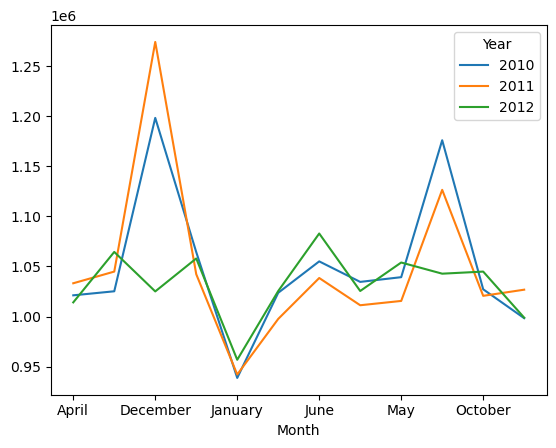

In [63]:
monthly_sales.plot();

In [64]:
monthly_fuelprice=pd.pivot_table(data=data, index='Month',columns='Year',values='Fuel_Price')
monthly_fuelprice

Year,2010,2011,2012
Month,,,
April,2.867767,3.600711,3.959933
August,2.778411,3.656600,3.734650
December,2.902726,3.405083,3.896733
Febrary,2.744211,3.360111,3.626341
January,2.734333,3.328982,3.481206
July,2.806144,3.550316,3.600494
June,2.777237,3.826415,3.580581
March,2.818256,3.663896,3.729267
May,2.838248,3.908544,3.822674


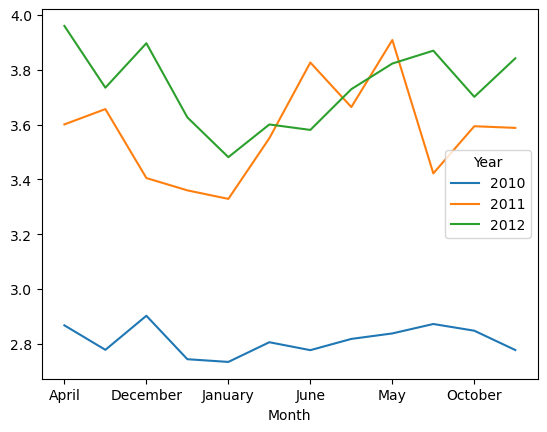

In [65]:
monthly_fuelprice.plot();

In [66]:
monthly_daily_sale=pd.pivot_table(data=data,index='WeekDay',columns='Year',values='Weekly_Sales',aggfunc='mean')
monthly_daily_sale

Year,2010,2011,2012
WeekDay,,,
Friday,1.038617e+06,1.061596e+06,NaN
Monday,1.079489e+06,9.657554e+05,1.111320e+06
Saturday,1.043764e+06,1.058152e+06,NaN
Sunday,1.059719e+06,1.157963e+06,1.077530e+06
Thursday,1.056928e+06,1.042624e+06,1.015965e+06
Tuesday,NaN,1.030142e+06,NaN
Wednesday,1.097339e+06,1.024634e+06,1.074610e+06


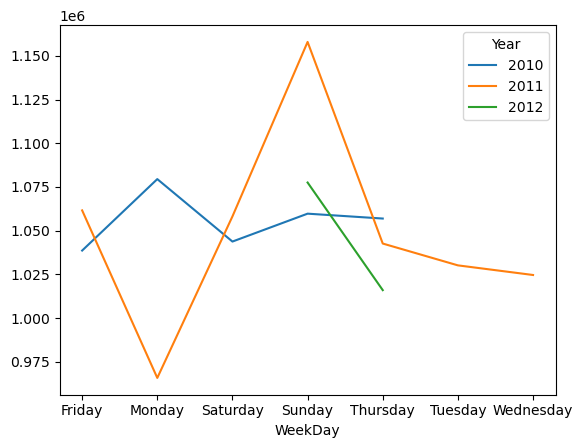

In [67]:
monthly_daily_sale.plot();

In [68]:
weather_cpi=pd.pivot_table(data=data,index='weather',columns='Year',values='CPI',aggfunc='sum')
weather_cpi

Year,2010,2011,2012
weather,,,
cold,159005.018194,183557.817835,121869.805063
normal,144298.609191,150508.290294,159591.493779
hot,59796.220684,67350.867257,58128.842121


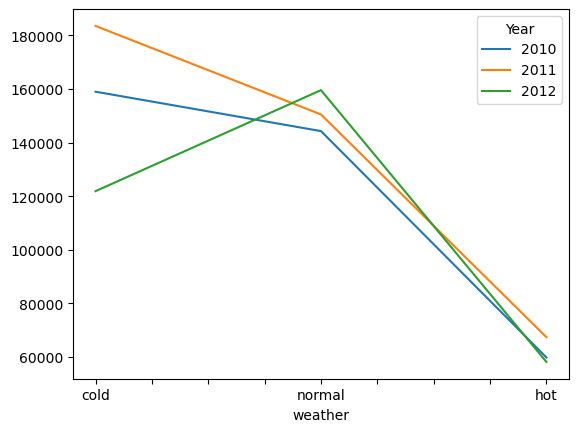

In [69]:
weather_cpi.plot();